# Power Production Project

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv (r'powerproduction.csv')
print (df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [21]:
df.dtypes

speed    float64
power    float64
dtype: object

In [22]:
df.isnull().values.any()

False

In [23]:
#df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 3)], axis=1)
df_remove_power_Zero =  df[df.power != 0]

In [24]:
print(df_remove_power_Zero)

      speed    power
5     0.325    4.331
6     0.400    5.186
7     0.450    3.826
8     0.501    1.048
9     0.526    5.553
..      ...      ...
485  24.249  103.700
486  24.299   93.694
487  24.349   93.078
488  24.374   98.223
489  24.399   95.117

[451 rows x 2 columns]


In [25]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [26]:
df_remove_power_Zero.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


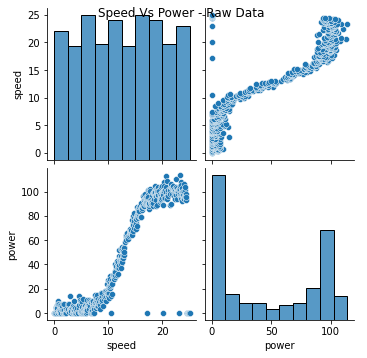

In [27]:
sns.pairplot(df).add_legend().fig.suptitle('Speed Vs Power - Raw Data')
plt.show()

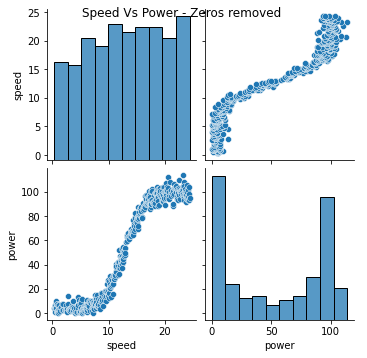

In [28]:
sns.pairplot(df_remove_power_Zero).add_legend().fig.suptitle('Speed Vs Power - Zeros removed')
plt.show()

In [33]:
import sklearn.linear_model as lin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X = df_remove_power_Zero.values[:,0]
Y = df_remove_power_Zero.values[:,1]

In [35]:
X_reshape =  X.reshape(-1, 1)
Y_reshape = Y.reshape(-1,1)

In [36]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_reshape, Y, test_size=0.20, random_state=7)

In [37]:
lin_reg_model = lin.LinearRegression().fit(X_train,Y_train)

In [38]:
r = lin_reg_model.score(X_validation, Y_validation)

In [43]:
print(r)

0.9038134283916828


In [39]:
Y_pred = lin_reg_model.predict(X_validation)
#print(Y_pred[2])
for i in range(0,len(Y_pred)):
    a = X_validation[i]
    b = round(Y_pred[i],3)
    c = round(Y_validation[i],3)
    print("Wind Speed: "+ str(a) +"\nPREDICTED VALUE:" + str(b) + ", ACTUAL VALUE:" +str(c) + "\nPERCENTAGE DIFFERENCE: "+ str(round((((b/c)-1)*100),3)) +"%\n")

Wind Speed: [10.561]
PREDICTED VALUE:39.465, ACTUAL VALUE:22.758
PERCENTAGE DIFFERENCE: 73.412%

Wind Speed: [22.723]
PREDICTED VALUE:108.234, ACTUAL VALUE:93.964
PERCENTAGE DIFFERENCE: 15.187%

Wind Speed: [24.349]
PREDICTED VALUE:117.428, ACTUAL VALUE:93.078
PERCENTAGE DIFFERENCE: 26.161%

Wind Speed: [22.523]
PREDICTED VALUE:107.103, ACTUAL VALUE:97.256
PERCENTAGE DIFFERENCE: 10.125%

Wind Speed: [9.309]
PREDICTED VALUE:32.386, ACTUAL VALUE:12.881
PERCENTAGE DIFFERENCE: 151.425%

Wind Speed: [20.17]
PREDICTED VALUE:93.798, ACTUAL VALUE:96.963
PERCENTAGE DIFFERENCE: -3.264%

Wind Speed: [5.681]
PREDICTED VALUE:11.872, ACTUAL VALUE:3.036
PERCENTAGE DIFFERENCE: 291.041%

Wind Speed: [10.11]
PREDICTED VALUE:36.915, ACTUAL VALUE:26.427
PERCENTAGE DIFFERENCE: 39.687%

Wind Speed: [20.571]
PREDICTED VALUE:96.066, ACTUAL VALUE:103.405
PERCENTAGE DIFFERENCE: -7.097%

Wind Speed: [14.364]
PREDICTED VALUE:60.969, ACTUAL VALUE:76.551
PERCENTAGE DIFFERENCE: -20.355%

Wind Speed: [23.248]
PREDICT

In [40]:
all_lin_reg = lin.LinearRegression().fit(X_reshape,Y_reshape)

In [42]:
all_lin_reg.predict(np.array([[15]]))[0]

array([64.44473211])

Sources:
    https://www.duo.uio.no/bitstream/handle/10852/57735/Master_Thesis_Finn_Erik_20170525_FINAL.pdf?isAllowed=y&sequence=7